In [5]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


centers = [[1, 1,1], [-1, -1,-1], [1, -1,1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
print X

[[-0.02332028  1.39405686  0.51630331]
 [ 0.44361432 -1.02106747  0.74294045]
 [-1.02004672 -0.09909932 -1.44059158]
 ..., 
 [-0.51213242 -0.44554794 -1.17614344]
 [ 0.31406084 -1.0523103   0.73327984]
 [ 0.7199047  -1.29533057  1.10229879]]


In [17]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

print db

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print labels
print db.components_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    min_samples=10, p=None, random_state=None)
[ 2  0  1  1  2  2  1  0  1  0  2  2  2  2 -1  1  0  2 -1  2  1  1  1  2  0
  2  0  2  0  0  0  2  2  0  0 -1 -1 -1  0  2  0 -1 -1  1  0  0  0  2  2 -1
 -1  1 -1  0 -1 -1  1 -1  0  1  2  1  2  1  1 -1  1  1  0  1  0  0 -1  1  2
  1  2  2  2  2  0  2  0  0  0  0  1  2  0  1  1 -1  1  1 -1  2  1 -1  2  0
  2 -1  0  1  2  0  1 -1 -1  0  1 -1  1  0  1 -1  1  2  0  0  0  1 -1  2 -1
  1 -1  0  0  2 -1  1  1 -1  2  1 -1  0  0  0  2  1  2  2  1  2  2  0  1  1
  2  2  2  1  1  2  2 -1 -1 -1 -1 -1  0  0  1  2  0  1  0  1  2  1 -1  2  2
 -1 -1  2  1  0  1  1  1  1 -1  1 -1  1  0  2  1  0 -1  2 -1  2 -1  0  2  0
  1 -1  2  0  1 -1  2  1 -1  1  1  0  1  2  1  2 -1  1 -1  1 -1  2  1  0  1
 -1  0  0  1  0 -1  2  2  2  2  2  0  0  1  2 -1  1  2  2  1 -1 -1  2  0  1
  2  2  0  1 -1  2  1  1  0 -1  1 -1  0 -1  1  0  1 -1  1  1  1  0 -1  0  2
  0  0 -1  1 -1  0  1  0  2  2  0  2  0  1  1  0 

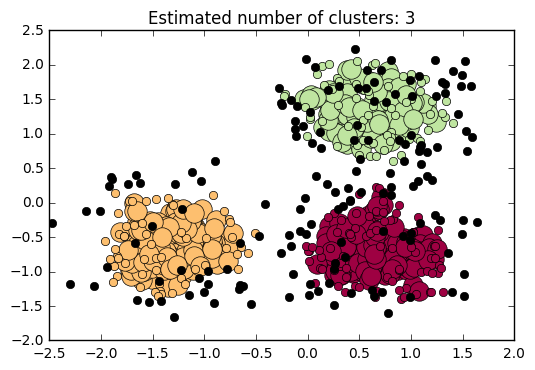

In [18]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()